# Getting started
## Loading modules and functions

In [12]:
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices

patsy是一个Python库，用于描述统计模型和使用类似于r的公式构建设计矩阵。

## Data

In [15]:
df=pd.read_csv("E:\code_studying\Rdatasets-master\csv\HistData\Guerry.csv")
df.head()

,Unnamed: 0,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,1,E,Ain,28870,15890,37,5098,33120,35039,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,2,N,Aisne,26226,5521,51,8901,14572,12831,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,3,C,Allier,26747,7925,13,10973,17044,114121,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [16]:
vars=['Department','Lottery','Literacy','Wealth','Region']
df=df[vars]
df[-5:]

,Department,Lottery,Literacy,Wealth,Region
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C
85,Corse,83,49,37,NaN


In [18]:
df=df.dropna()
df[-5:]

,Department,Lottery,Literacy,Wealth,Region
80,Vendee,68,28,56,W
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C


## 实质动机与模型
我们想知道法国86个省的识字率是否与19世纪20年代皇家乐透的人均赌注有关。我们需要控制每个部门的财富水平，我们还需要在回归方程的右侧加入一系列虚拟变量来控制**由于区域效应而未观察到的异质性。**利用普通最小二乘回归(OLS)对模型进行估计。

## 设计矩阵
statsmodels需要创造两个*设计矩阵*，第一个是内生变量(即依赖、响应、回归等)的矩阵。二是外生变量(即独立变量、预测变量、回归变量等)的矩阵。OLS系数估计值照常计算:
$$\hat{\beta }=({X}'X)^{-1}{X}y'$$
其中$y$是人均彩票投注(彩票)的$N\times 1$列数据，$X$是$N\times7$附带一个截距，*文化*和*财富*变量，和**4个区域二元变量。**（因为区域有4个类别，所以类似于独热编码的形式，可以见下面的`X`）

In [19]:
y,X=dmatrices('Lottery ~ Literacy+Wealth+Region',data=df,return_type='dataframe')

The resulting matrices/data frames look like this:

In [23]:
y.head()

,Lottery
0,41.0
1,38.0
2,66.0
3,80.0
4,79.0


In [24]:
X.head()

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0
3,1.0,1.0,0.0,0.0,0.0,46.0,76.0
4,1.0,1.0,0.0,0.0,0.0,69.0,83.0


## 模型的拟合与总结
在statsmodel中拟合一个模型通常需要三个简单的步骤:
- 使用模型类来描述模型
- 使用类方法拟合模型
- 使用总结方法检查结果

以OLS为例，如下所示：

In [25]:
mod=sm.OLS(y,X)
res=mod.fit() #fit model
print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           1.07e-05
Time:                        10:03:44   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

res对象有许多有用的属性。例如，我们可以通过输入来提取参数估计和决定系数：

决定系数：r-squared

In [26]:
res.params

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

In [29]:
res.rsquared #决定系数

0.337950869192882

## 诊断和规范测试

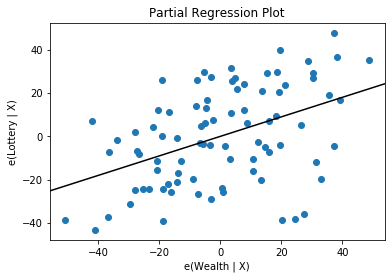

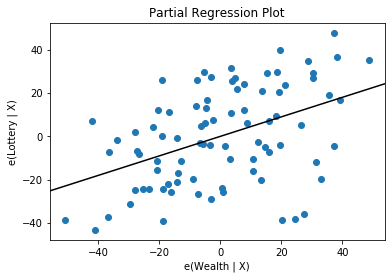

In [31]:
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'],
                              data=df, obs_labels=False)